## Import the required libraries

In [194]:
import numpy as np  # linear algebra
import pandas as pd # data processing, reading CSV files etc.

### Assumptions
- This notebook assumes that the training data file is available within the same folder as the notebook (.ipynb).
- To avoid minor errors, the training data file is unaltered from the source that it is downloaded i.e. 'fraudTrain.csv'.

### Load the data
Downloaded from the kaggle dataset: [Credit Card Transactions Fraud Detection Dataset](https://www.kaggle.com/datasets/kartik2112/fraud-detection/data) <br>
[Download Link](https://www.kaggle.com/datasets/kartik2112/fraud-detection/download?datasetVersionNumber=1)

In [195]:
# trng_df is the variable given to the training dataframe
trng_df = pd.read_csv('./fraudTrain.csv')

In [196]:
trng_df.head() # print the top 5 data items in the dataframe

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [197]:
trng_df.head().T.style.set_properties(**{'background-color': 'black',
                                            'color': 'orange',
                                            'border-color': 'white'})

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
trans_date_trans_time,2019-01-01 00:00:18,2019-01-01 00:00:44,2019-01-01 00:00:51,2019-01-01 00:01:16,2019-01-01 00:03:06
cc_num,2703186189652095,630423337322,38859492057661,3534093764340240,375534208663984
merchant,"fraud_Rippin, Kub and Mann","fraud_Heller, Gutmann and Zieme",fraud_Lind-Buckridge,"fraud_Kutch, Hermiston and Farrell",fraud_Keeling-Crist
category,misc_net,grocery_pos,entertainment,gas_transport,misc_pos
amt,4.970000,107.230000,220.110000,45.000000,41.960000
first,Jennifer,Stephanie,Edward,Jeremy,Tyler
last,Banks,Gill,Sanchez,White,Garcia
gender,F,F,M,M,M
street,561 Perry Cove,43039 Riley Greens Suite 393,594 White Dale Suite 530,9443 Cynthia Court Apt. 038,408 Bradley Rest


## Get the details and information of the training dataset
1. Data types information
2. Check for missing values in the dataset
3. Evaluate the imbalance in the dataset

In [198]:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [199]:
colors = ['orange', 'white']
labels = ['Genuine', 'Fraudulent']
values = trng_df['is_fraud'].value_counts()/trng_df['is_fraud'].shape[0]
# print(values)
fig = go.Figure(data=[go.Pie(labels = labels, values = values, hole=.2)])
fig.update_layout(title_text='Credit Card Fraud', title_font_color='black')

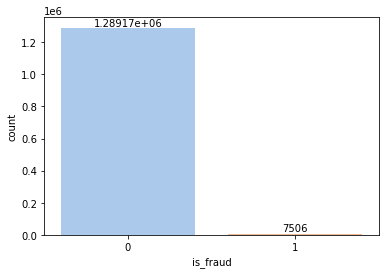

In [200]:
plt.figure()
ax = sns.countplot(x='is_fraud', data=trng_df, palette='pastel')
for i in ax.containers:
    ax.bar_label(i, )

## Data Cleaning

In [201]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [202]:
trng_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Drop columns that are not relevant to the model

In [203]:
drop_columns = ['Unnamed: 0', 'cc_num', 'merchant', 'trans_num', 'unix_time', 'first', 'last', 'street', 'zip']
trng_df.drop(columns=drop_columns, inplace=True)

In [204]:
print(trng_df.shape)

(1296675, 14)


In [205]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   city                   1296675 non-null  object 
 5   state                  1296675 non-null  object 
 6   lat                    1296675 non-null  float64
 7   long                   1296675 non-null  float64
 8   city_pop               1296675 non-null  int64  
 9   job                    1296675 non-null  object 
 10  dob                    1296675 non-null  object 
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

## handle date time

In [206]:
trng_df['trans_date_trans_time']=pd.to_datetime(trng_df['trans_date_trans_time'])
trng_df['trans_date']=trng_df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
trng_df['trans_date']=pd.to_datetime(trng_df['trans_date'])
trng_df['dob']=pd.to_datetime(trng_df['dob'])

In [207]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

## feature engineering

In [208]:
#Calculate Age
trng_df["age"] = trng_df["trans_date"]-trng_df["dob"]
trng_df["age"] = trng_df["age"].astype('timedelta64[Y]')
trng_df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0


In [209]:
trng_df['trans_month'] = pd.DatetimeIndex(trng_df['trans_date']).month

In [210]:
trng_df['trans_year'] = pd.DatetimeIndex(trng_df['trans_date']).year

In [211]:
trng_df.head()

,trans_date_trans_time,category,amt,gender,city,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,trans_date,age,trans_month,trans_year
0,2019-01-01 00:00:18,misc_net,4.97,F,Moravian Falls,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,30.0,1,2019
1,2019-01-01 00:00:44,grocery_pos,107.23,F,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,40.0,1,2019
2,2019-01-01 00:00:51,entertainment,220.11,M,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,56.0,1,2019
3,2019-01-01 00:01:16,gas_transport,45.00,M,Boulder,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,51.0,1,2019
4,2019-01-01 00:03:06,misc_pos,41.96,M,Doe Hill,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,32.0,1,2019


In [212]:
#Calculate distance between merchant and home location
trng_df['latitudinal_distance'] = abs(round(trng_df['merch_lat']-trng_df['lat'],3))
trng_df['longitudinal_distance'] = abs(round(trng_df['merch_long']-trng_df['long'],3))

In [213]:
#Drop Columns that are not relevant to predicy fraud transaction
drop_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
trng_df.drop(columns=drop_columns,inplace=True)

In [214]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   category               1296675 non-null  object 
 1   amt                    1296675 non-null  float64
 2   gender                 1296675 non-null  object 
 3   city_pop               1296675 non-null  int64  
 4   is_fraud               1296675 non-null  int64  
 5   age                    1296675 non-null  float64
 6   trans_month            1296675 non-null  int64  
 7   trans_year             1296675 non-null  int64  
 8   latitudinal_distance   1296675 non-null  float64
 9   longitudinal_distance  1296675 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 98.9+ MB


In [138]:
trng_df.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,F,3495,0,30.0,1,2019,0.068,0.870
1,grocery_pos,107.23,F,149,0,40.0,1,2019,0.271,0.024
2,entertainment,220.11,M,4154,0,56.0,1,2019,0.970,0.108
3,gas_transport,45.00,M,1939,0,51.0,1,2019,0.804,0.447
4,misc_pos,41.96,M,99,0,32.0,1,2019,0.254,0.830


In [215]:
trng_df.gender = trng_df.gender.apply(lambda x: 1 if x=="M" else 0)

In [216]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   category               1296675 non-null  object 
 1   amt                    1296675 non-null  float64
 2   gender                 1296675 non-null  int64  
 3   city_pop               1296675 non-null  int64  
 4   is_fraud               1296675 non-null  int64  
 5   age                    1296675 non-null  float64
 6   trans_month            1296675 non-null  int64  
 7   trans_year             1296675 non-null  int64  
 8   latitudinal_distance   1296675 non-null  float64
 9   longitudinal_distance  1296675 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 98.9+ MB


In [217]:
trng_df.head()

,category,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance
0,misc_net,4.97,0,3495,0,30.0,1,2019,0.068,0.870
1,grocery_pos,107.23,0,149,0,40.0,1,2019,0.271,0.024
2,entertainment,220.11,1,4154,0,56.0,1,2019,0.970,0.108
3,gas_transport,45.00,1,1939,0,51.0,1,2019,0.804,0.447
4,misc_pos,41.96,1,99,0,32.0,1,2019,0.254,0.830


In [69]:
pip install imblearn

     |████████████████████████████████| 235 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 3.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [218]:
trng_df = pd.get_dummies(trng_df, columns=['category'], prefix='category')

In [219]:
trng_df.head()

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,1,2019,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,1,2019,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,1,2019,0.970,0.108,1,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,1,2019,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,1,2019,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0


In [220]:
X_train = trng_df.drop('is_fraud', axis=1)
y_train = trng_df['is_fraud']

In [221]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [160]:
X_train.head()

,amt,gender,city_pop,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_entertainment,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,30.0,1,2019,0.068,0.870,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,40.0,1,2019,0.271,0.024,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,56.0,1,2019,0.970,0.108,1,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,51.0,1,2019,0.804,0.447,0,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,32.0,1,2019,0.254,0.830,0,0,...,0,0,0,0,0,1,0,0,0,0


In [222]:
from imblearn.over_sampling import SMOTE

In [223]:
smote = SMOTE(random_state=42)

In [224]:
# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train, y_train)

In [185]:
from sklearn.preprocessing import StandardScaler

In [225]:
# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [226]:
# Step 2: Transform both the training and testing data
X_train = scaler.transform(X_train)

In [227]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Feature Engineering for the dataset
def featEngg(fileLoc, training_df):
    # Import required libraries for the function
    import pandas as pd
    
    # Read the data from the csv file
    df = pd.read_csv(fileLoc)

    # Drop columns that are not relevant to create the prediction model
    drop_columns = ['Unnamed: 0', 'cc_num', 'merchant', 'trans_num', 'unix_time', 'first', 'last', 'street', 'zip']
    df.drop(columns=drop_columns, inplace=True)

    # Handle Transaction date and time column from the dataset
    df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
    df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    df['trans_date']=pd.to_datetime(df['trans_date'])
    df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
    df['trans_year'] = pd.DatetimeIndex(df['trans_date']).year

    # Calculate Age
    df['dob']=pd.to_datetime(df['dob'])
    df["age"] = df["trans_date"]-df["dob"]
    df["age"] = df["age"].astype('timedelta64[Y]')

    # Calculate distance between the merchant and the transaction location
    df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
    df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))

    # Drop the rest of the columsn that are irrelevant after computational changes to the dataset
    drop_add_columns = ['trans_date_trans_time','city','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
    df.drop(columns=drop_add_columns,inplace=True)

    # Convert categorical column 'gender' to numerical column
    df.gender = df.gender.apply(lambda x: 1 if x=="M" else 0)

    # Convert categorical column category to numerical column
    df = pd.get_dummies(df, columns=['category'], prefix='category')

    df = df.reindex(columns=training_df.columns, fill_value=0)
    return df

In [228]:
test_df = featEngg('./fraudTest.csv', trng_df)

In [229]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   amt                      555719 non-null  float64
 1   gender                   555719 non-null  int64  
 2   city_pop                 555719 non-null  int64  
 3   is_fraud                 555719 non-null  int64  
 4   age                      555719 non-null  float64
 5   trans_month              555719 non-null  int64  
 6   trans_year               555719 non-null  int64  
 7   latitudinal_distance     555719 non-null  float64
 8   longitudinal_distance    555719 non-null  float64
 9   category_entertainment   555719 non-null  uint8  
 10  category_food_dining     555719 non-null  uint8  
 11  category_gas_transport   555719 non-null  uint8  
 12  category_grocery_net     555719 non-null  uint8  
 13  category_grocery_pos     555719 non-null  uint8  
 14  cate

In [230]:
trng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   amt                      1296675 non-null  float64
 1   gender                   1296675 non-null  int64  
 2   city_pop                 1296675 non-null  int64  
 3   is_fraud                 1296675 non-null  int64  
 4   age                      1296675 non-null  float64
 5   trans_month              1296675 non-null  int64  
 6   trans_year               1296675 non-null  int64  
 7   latitudinal_distance     1296675 non-null  float64
 8   longitudinal_distance    1296675 non-null  float64
 9   category_entertainment   1296675 non-null  uint8  
 10  category_food_dining     1296675 non-null  uint8  
 11  category_gas_transport   1296675 non-null  uint8  
 12  category_grocery_net     1296675 non-null  uint8  
 13  category_grocery_pos     1296675 non-null 

In [231]:
X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']
X_test = scaler.transform(X_test)

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Decision Tree classifier on the training data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.42      0.63      0.50      2145

    accuracy                           1.00    555719
   macro avg       0.71      0.81      0.75    555719
weighted avg       1.00      1.00      1.00    555719



In [234]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the Random Forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/rahulsunkari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/_6/y8lkv2y54x1_h7fhgy05fxq80000gn/T/ipykernel_7490/1401950046.py", line 5, in <cell line: 5>
    clf.fit(X_train, y_train)
  File "/Users/rahulsunkari/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Users/rahulsunkari/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1046, in __call__
    Use None to disable memmapping of large arrays.
  File "/Users/rahulsunkari/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "/Users/rahulsunkari/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 779, in _dispatch
  File "/Users/rahulsunkari/opt/anaconda3/lib/python3.9/site-packag

In [ ]:

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)